In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
import numpy as np
warnings.filterwarnings("ignore")

In [ ]:

df = pd.read_csv('Jamboree_Admission.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.shape

(500, 9)

Removing uniquely identifying column

In [ ]:
df = df.drop(['Serial No.'], axis=1)
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
df.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

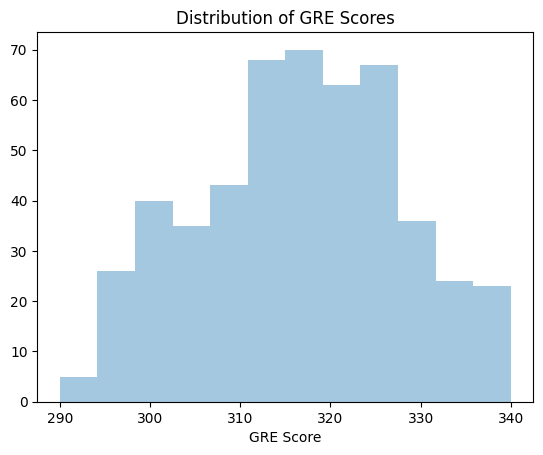

In [ ]:
fig = sns.distplot(df['GRE Score'], kde=False)
plt.title("Distribution of GRE Scores")
plt.show()

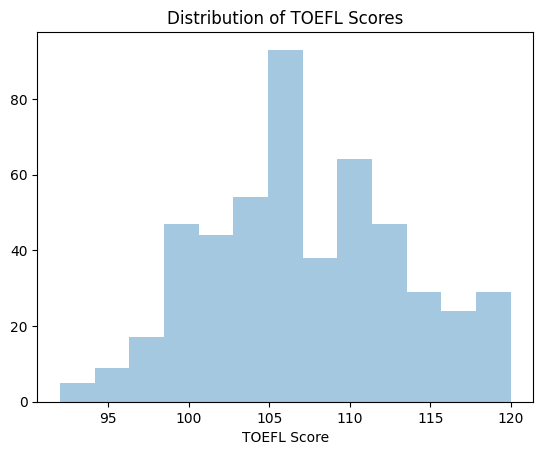

In [ ]:
fig = sns.distplot(df['TOEFL Score'], kde=False)
plt.title("Distribution of TOEFL Scores")
plt.show()

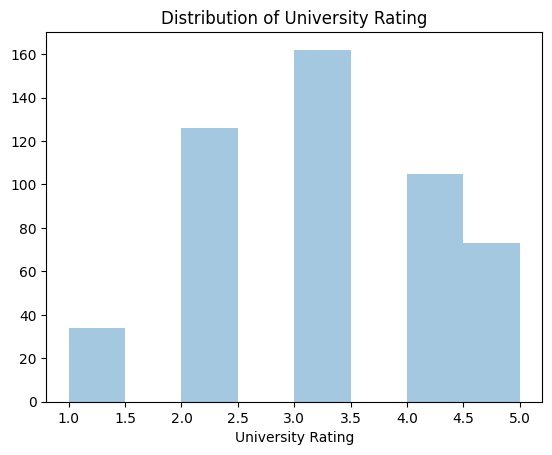

In [ ]:
fig = sns.distplot(df['University Rating'], kde=False)
plt.title("Distribution of University Rating")
plt.show()

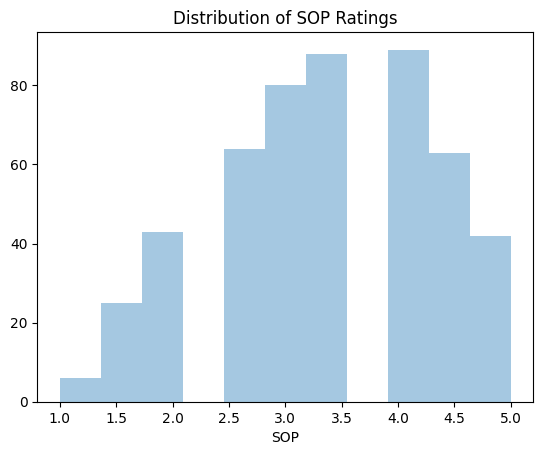

In [ ]:

fig = sns.distplot(df['SOP'], kde=False)
plt.title("Distribution of SOP Ratings")
plt.show()

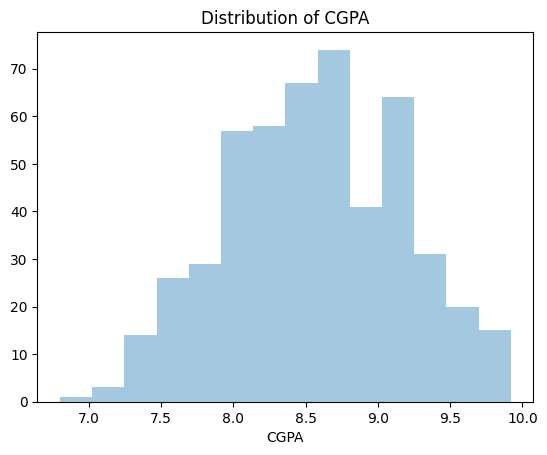

In [ ]:
fig = sns.distplot(df['CGPA'], kde=False)
plt.title("Distribution of CGPA")
plt.show()

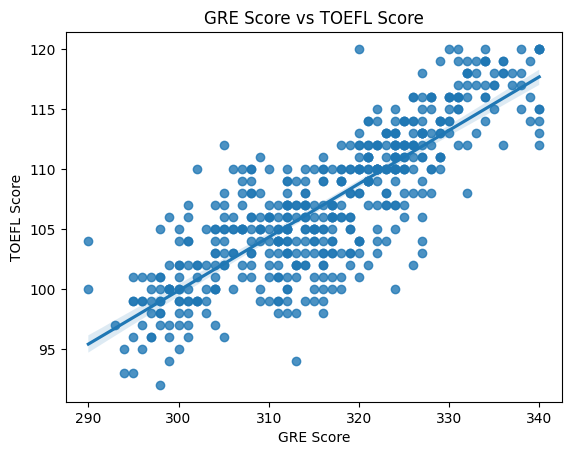

In [ ]:
fig = sns.regplot(x="GRE Score", y="TOEFL Score", data=df)
plt.title("GRE Score vs TOEFL Score")
plt.show()

**People with higher GRE Scores also have higher TOEFL Scores.**


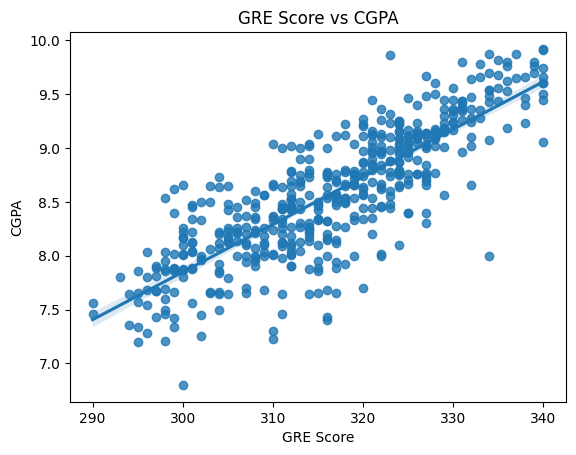

In [ ]:
fig = sns.regplot(x="GRE Score", y="CGPA", data=df)
plt.title("GRE Score vs CGPA")
plt.show()


**Although there are exceptions, people with higher CGPA usually have higher GRE scores**

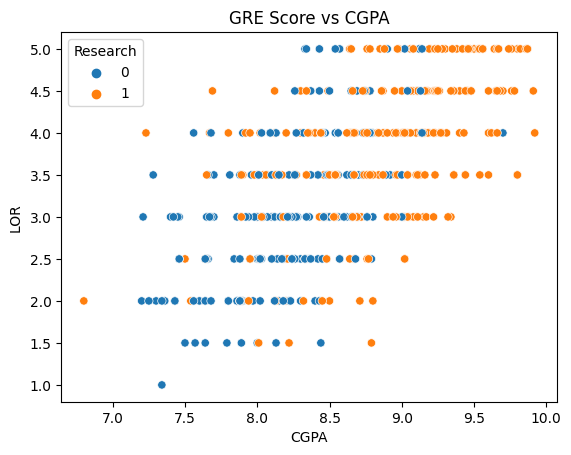

In [ ]:
fig = sns.scatterplot(x="CGPA", y="LOR ", data=df, hue="Research")
plt.title("GRE Score vs CGPA")
plt.show()


There is not much relationship between LOR and CGPA

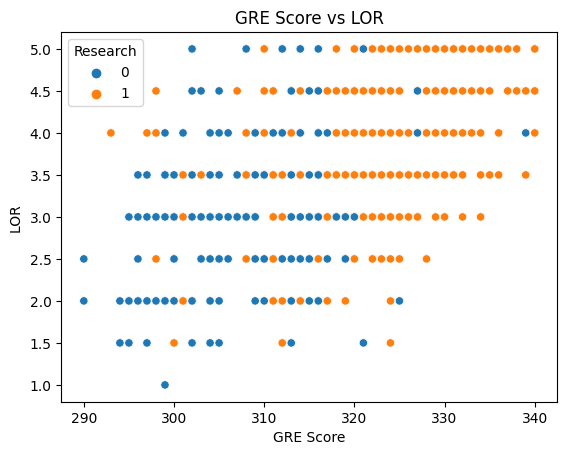

In [ ]:
fig = sns.scatterplot(x="GRE Score", y="LOR ", data=df, hue="Research")
plt.title("GRE Score vs LOR")
plt.show()


There is not much relationship between LOR and GRE score

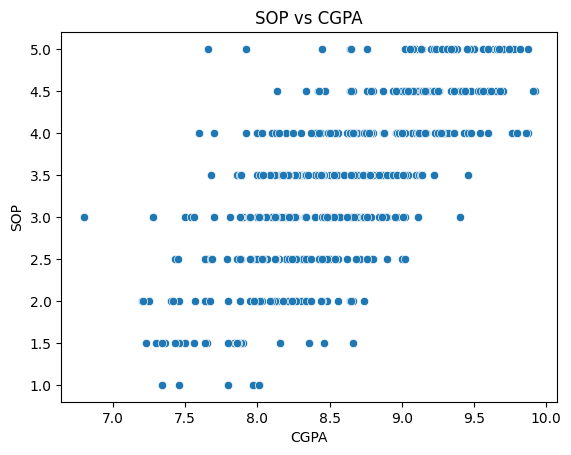

In [ ]:
fig = sns.scatterplot(x="CGPA", y="SOP", data=df)
plt.title("SOP vs CGPA")
plt.show()


Here too, there isn't a concrete relationship between SOP strength and CGPA

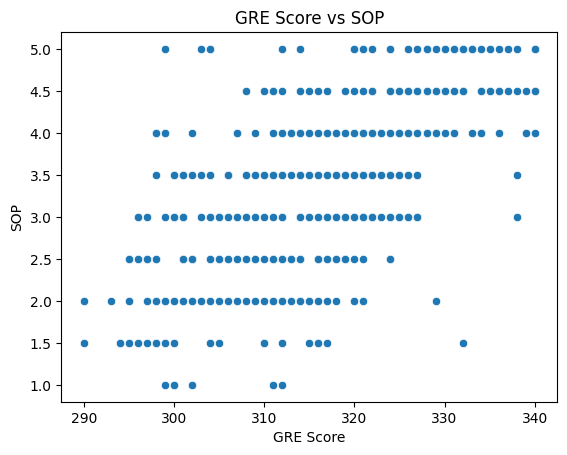

In [ ]:
fig = sns.scatterplot(x="GRE Score", y="SOP", data=df)
plt.title("GRE Score vs SOP")
plt.show()


There isn't a concrete relationship between SOP strength and GRE Score

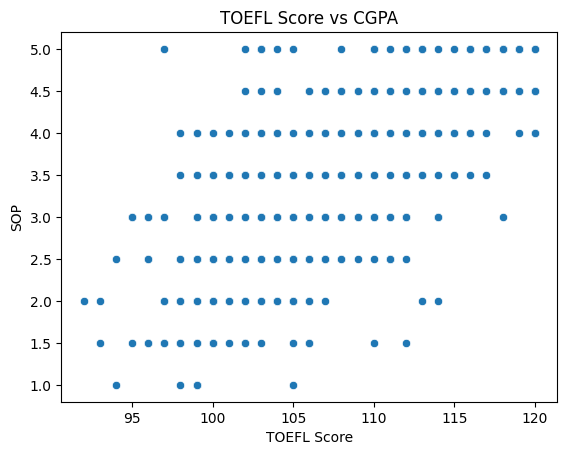

In [ ]:
fig = sns.scatterplot(x="TOEFL Score", y="SOP", data=df)
plt.title("TOEFL Score vs CGPA")
plt.show()

There isn't a concrete relationship between SOP strength and TOEFL Score

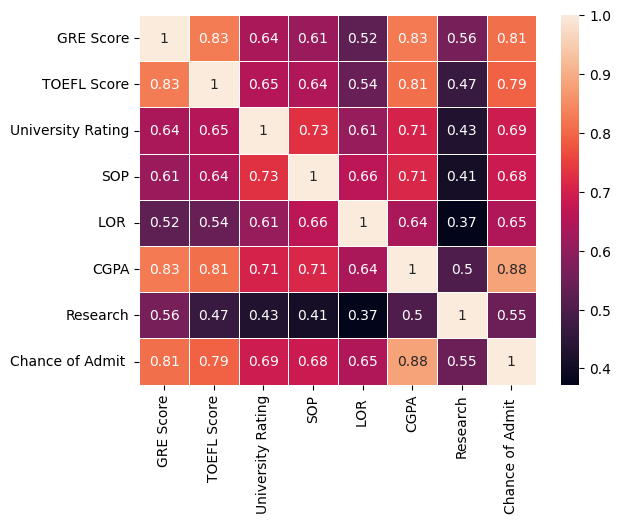

In [ ]:
corr = df.corr()
sns.heatmap(corr, linewidths=.5, annot=True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['Chance of Admit '], axis=1)
y = df['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, shuffle=True)
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
320,317,106,3,4.0,3.5,8.50,1
411,313,94,2,2.5,1.5,8.13,0
160,315,103,1,1.5,2.0,7.86,0
47,339,119,5,4.5,4.0,9.70,0
374,315,105,2,2.0,2.5,7.65,0
...,...,...,...,...,...,...,...
298,330,114,3,4.5,4.5,9.24,1
234,330,113,5,5.0,4.0,9.31,1
389,320,108,3,3.5,4.0,8.44,1
40,308,110,3,3.5,3.0,8.00,1


In [ ]:
y_train

320    0.75
411    0.56
160    0.57
47     0.89
374    0.39
       ... 
298    0.90
234    0.91
389    0.76
40     0.46
231    0.74
Name: Chance of Admit , Length: 400, dtype: float64

In [ ]:
#Standardization
from sklearn.preprocessing import StandardScaler
X_train_columns=X_train.columns
std=StandardScaler()
X_train_std=std.fit_transform(X_train)


In [ ]:
X_train_std

array([[ 0.07541476, -0.17265123, -0.08492742, ...,  0.00270965,
        -0.09979694,  0.8819171 ],
       [-0.27637422, -2.15051739, -0.9559779 , ..., -2.16500957,
        -0.71063018, -1.13389342],
       [-0.10047973, -0.66711777, -1.82702838, ..., -1.62307976,
        -1.15637336, -1.13389342],
       ...,
       [ 0.3392565 ,  0.15699313, -0.08492742, ...,  0.54463945,
        -0.19885098,  0.8819171 ],
       [-0.71611045,  0.48663749, -0.08492742, ..., -0.53922016,
        -0.92524727,  0.8819171 ],
       [ 0.25130926, -0.17265123, -0.08492742, ..., -1.08114996,
        -0.38045005,  0.8819171 ]])

In [ ]:
X_train=pd.DataFrame(X_train_std, columns=X_train_columns)
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.075415,-0.172651,-0.084927,0.675717,0.002710,-0.099797,0.881917
1,-0.276374,-2.150517,-0.955978,-0.828662,-2.165010,-0.710630,-1.133893
2,-0.100480,-0.667118,-1.827028,-1.831582,-1.623080,-1.156373,-1.133893
3,2.010254,1.970037,1.657174,1.177177,0.544639,1.881284,-1.133893
4,-0.100480,-0.337473,-0.955978,-1.330122,-1.081150,-1.503062,-1.133893
...,...,...,...,...,...,...,...
395,1.218729,1.145926,-0.084927,1.177177,1.086569,1.121870,0.881917
396,1.218729,0.981104,1.657174,1.678637,0.544639,1.237433,0.881917
397,0.339257,0.156993,-0.084927,0.174257,0.544639,-0.198851,0.881917
398,-0.716110,0.486637,-0.084927,0.174257,-0.539220,-0.925247,0.881917


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
models = [['Linear Regression :', LinearRegression()],['Lasso Regression :', Lasso(alpha=0.1)],['Ridge Regression :', Ridge(alpha=1.0)]]
print("Results without removing features with multicollinearity ...")

Results without removing features with multicollinearity ...


In [ ]:
for name,model in models:
    model.fit(X_train, y_train.values)
    predictions = model.predict(std.transform(X_test))
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

Linear Regression : 0.06561588579110661
Lasso Regression : 0.1236207295891388
Ridge Regression : 0.06556665176207967


In [ ]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train.values, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     271.2
Date:                Thu, 22 Jun 2023   Prob (F-statistic):          5.83e-146
Time:                        06:28:06   Log-Likelihood:                 571.02
No. Observations:                 400   AIC:                            -1126.
Df Residuals:                     392   BIC:                            -1094.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7182      0.00

In [ ]:
X_train_new=X_train.drop(columns='SOP')
model1 = sm.OLS(y_train.values, X_train_new).fit()
print(model1.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     316.9
Date:                Thu, 22 Jun 2023   Prob (F-statistic):          3.61e-147
Time:                        06:30:41   Log-Likelihood:                 570.87
No. Observations:                 400   AIC:                            -1128.
Df Residuals:                     393   BIC:                            -1100.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7182      0.00

**Using VIF to check multicollinearity on the data**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(ds,col):
  ds=ds.drop(columns=col,axis=1)
  vif=pd.DataFrame()
  vif['features']=ds.columns
  vif['VIF_Value']=[variance_inflation_factor(ds.values,i) for i in range(ds.shape[1])]
  return vif

In [ ]:
calculate_vif(X_train_new,[])

,features,VIF_Value
0,const,1.000000
1,GRE Score,4.273359
2,TOEFL Score,3.834412
3,University Rating,2.183020
4,LOR,1.825444
5,CGPA,4.656477
6,Research,1.464945


VIF < 5. Hence, no issues

In [ ]:
X_test_std= std.transform(X_test)
X_test=pd.DataFrame(X_test_std, columns=X_train_columns)
X_test = sm.add_constant(X_test)
X_test_del=list(set(X_test.columns).difference(set(X_train_new.columns)))
print(f'Dropping {X_test_del} from test set')
X_test_new=X_test.drop(columns=X_test_del)
pred = model1.predict(X_test_new)

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
print('Mean Absolute Error ', mean_absolute_error(y_test.values,pred) )
print('Root Mean Square Error ', np.sqrt(mean_squared_error(y_test.values,pred) ))

Dropping ['SOP'] from test set
Mean Absolute Error  0.04711032101014787
Root Mean Square Error  0.06555112876506589


In [ ]:
residuals = y_test.values-pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals = ",mean_residuals)

Mean of Residuals =  0.004157748099180794


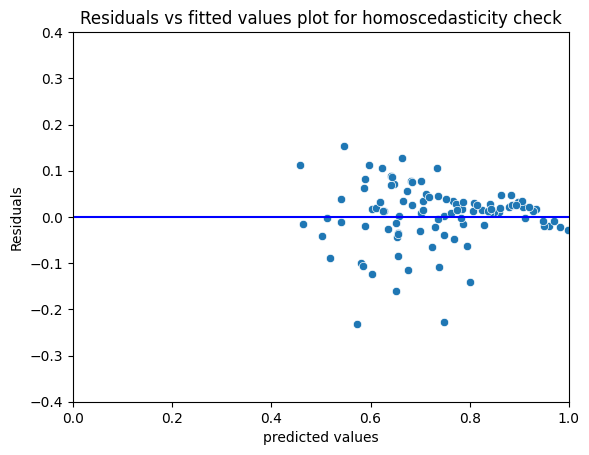

In [ ]:
p = sns.scatterplot(x=pred,y=residuals)
plt.xlabel('predicted values')
plt.ylabel('Residuals')
plt.ylim(-0.4,0.4)
plt.xlim(0,1)
p = sns.lineplot(x=[0,26],y=[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_test)
lzip(name, test)

[('F statistic', 2.673457173095583), ('p-value', 0.0009437542085349815)]

null hypothesis is error terms are homoscedastic and since p-values < 0.05, we reject the null hypothesis


**Normality of Residuals**

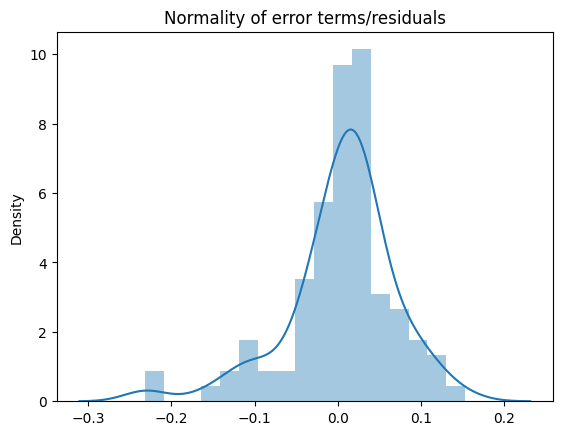

In [ ]:
sns.distplot(residuals,kde=True)
plt.title('Normality of error terms/residuals')
plt.show()


Text(0, 0.5, 'y_pred')

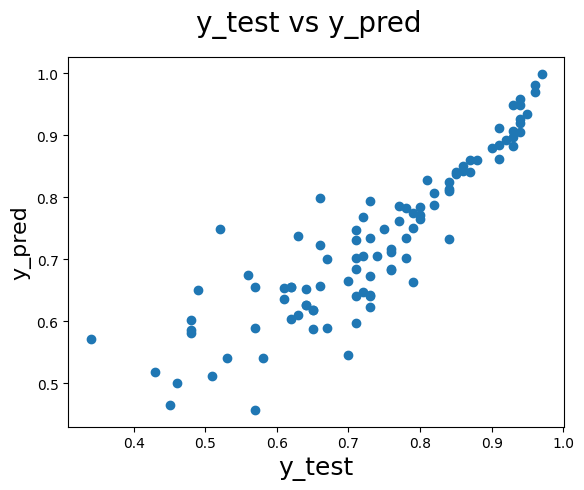

In [ ]:
fig = plt.figure()
plt.scatter(y_test.values, pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

# Insights and Recommendations

For smaller values of Y, prediction is not accurate, but for larger values of Y, prediction is correct. Hence there is a bias towards higher values of Y. So, the model is underfitting a bit.

This could be solved by providing more data points where Chances of Admit are low. We could also use another model apart from Linear Regression.
